# Analyse des données d'expérience

Expérience: J7 Energie Solaire, expérience 1

Date: 2023-10-01

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tikzplotlib

In [4]:
rawdata = np.loadtxt("../data/Pgamma(d).csv", dtype=float, delimiter=",", skiprows=1)
d2inverse = 1/rawdata[:,0]**2
d2inverse

array([0.00014872, 0.00015625, 0.00016437, 0.00017313, 0.00018262,
       0.0001929 , 0.00020408, 0.00021626, 0.00022957, 0.00024414,
       0.00026015, 0.00027778, 0.00029727, 0.00031888, 0.00034294,
       0.00036982, 0.0004    , 0.00043403, 0.00047259, 0.00051653,
       0.00056689, 0.000625  , 0.00069252, 0.0007716 , 0.00086505,
       0.00097656, 0.00111111, 0.00127551, 0.00147929, 0.0016    ,
       0.00173611])

In [6]:
# Pgamma
rawdata[:,1]

array([ 47.7,  50.6,  51.5,  54.4,  57. ,  59.7,  62.1,  65.3,  67.8,
        72.5,  76.3,  79.7,  85.6,  89.2,  94.6,  99.9, 107.4, 114.2,
       120.4, 130.1, 140.1, 149. , 159.5, 173.2, 185.9, 200.9, 218.2,
       237.8, 258.6, 271.6, 283.6])

In [10]:
delta_Pgamma = np.maximum.reduce((np.ones(len(rawdata[:,1])) * 10, rawdata[:,1] * 0.05))
delta_Pgamma

array([10.   , 10.   , 10.   , 10.   , 10.   , 10.   , 10.   , 10.   ,
       10.   , 10.   , 10.   , 10.   , 10.   , 10.   , 10.   , 10.   ,
       10.   , 10.   , 10.   , 10.   , 10.   , 10.   , 10.   , 10.   ,
       10.   , 10.045, 10.91 , 11.89 , 12.93 , 13.58 , 14.18 ])

In [5]:
coefs = np.polyfit(d2inverse, rawdata[:,1], 1)
fit = np.poly1d(coefs)
coefs

array([1.54791445e+05, 3.82661468e+01])

Text(0.5, 0.98, 'Fit linéaire de P$_\\gamma$ en fonction de 1/d²')

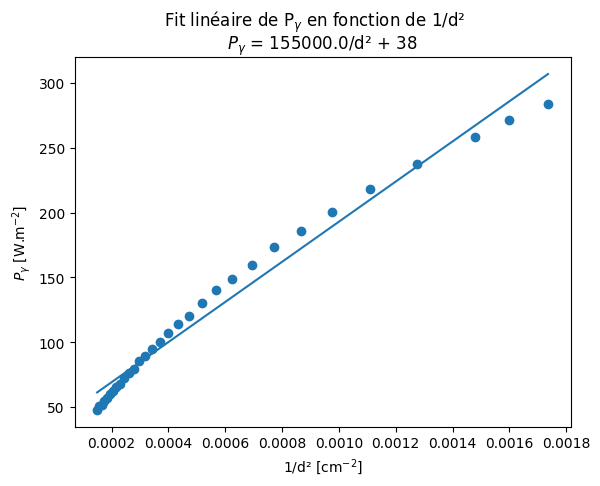

In [23]:
plt.scatter(d2inverse, rawdata[:,1])
plt.plot(d2inverse, fit(d2inverse))
plt.xlabel("1/d² [cm$^{-2}$]")
plt.ylabel("$P_\gamma$ [W.m$^{-2}$]")
plt.title(f"$P_\gamma$ = {round(coefs[0], -3)}/d² + {round(coefs[1])}")
#TODO: signifcant figures
plt.suptitle("Fit linéaire de P$_\gamma$ en fonction de 1/d²")

In [101]:
print(f"On obtient un fit donnant P$_\gamma$ = {coefs[0]}/d² + {coefs[1]}")

On obtient un fit donnant P$_\gamma$ = 154791.44455009775/d² + 38.266146816962475
